# Implementing digital IIR filters in the lattice form

Lab 8, SDP

## 1 Objective

The students should become familiar with *lattice-ladder*-type
realization structure used for implementing IIR filters.

## 2 Theoretical notions

The *lattice-ladder* implementation form of an IIR filter of order 3 is
below:

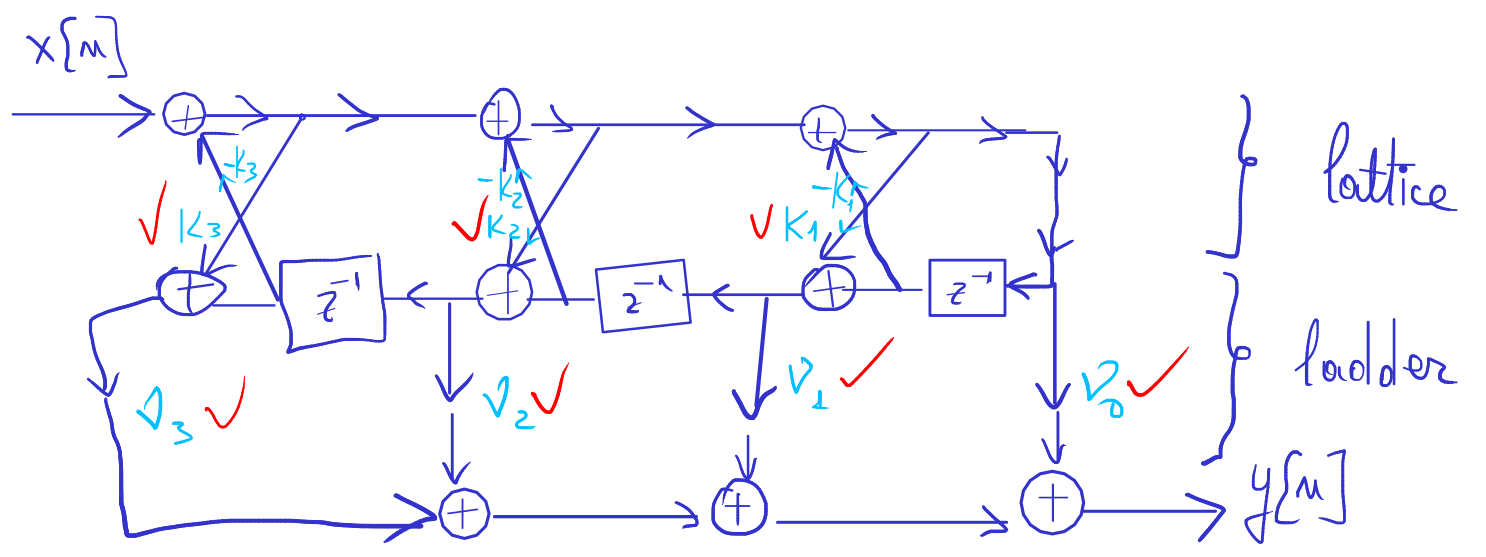

Equations:

$$\begin{aligned}
H(z) &= \frac{C(z)}{A(z)}
\end{aligned}$$

The reflection coefficients $K_i$ are found just like for FIR systems
(previous lab.): $$\begin{aligned}
A_0(z) &= B_0(z) = 1 \\
A_m(z) &= A_{m-1}(z) + K_m \cdot z^{-1} \cdot B_{m-1}(z) \\
A_{m-1}(z) &= \frac{A_m(z) - K_m  \cdot B_m(z)}{1 - K_m^2} \\
B_m(z) &= z^{-m} B_m(z^{-1}) = \textrm{ like }A_m(z)\textrm{, with coefficients reversed}
\end{aligned}$$

Additionally, for the $\nu_i$ coefficients we use a similar equation:
$$\begin{aligned}
C_{m-1}(z) &= C_m(z) - \nu_m  \cdot B_m(z)
\end{aligned}$$

## 3 Theoretical exercises

1.  Consider the causal IIR system with poles and zeros, with the system
    function:
    $$H(z) = \frac{ 1 + 2z^{-1} + 3z^{-2} + 2z^{-3} }{ 1 + \frac{2}{5}z^{-1} + \frac{7}{20}z^{-2} + \frac{1}{2}z^{-3} } $$

    Find and draw the equivalent *lattice* structure for the IIR filter.

2.  Consider the causal IIR system, with no zeros, with the following
    system function:
    $$H(z) = \frac{1}{ 1 + \frac{2}{5}z^{-1} + \frac{7}{20}z^{-2} + \frac{1}{2}z^{-3} } $$

    Find and draw the equivalent *lattice* structure for the IIR filter.

## 4 Practical exercises

1.  In Matlab, use the `fdatool` tool to design one of the following
    filters:

    1.  A low-pass IIR filter of order 4, elliptic type, with cutoff
        frequency of 6kHz at a sampling frequency of 44.1kHz;
    2.  A high-pass IIR filter of order 4, elliptic type, with cutoff
        frequency of 2.5kHz at a sampling frequency of 44.1kHz;
    3.  A band-pass IIR filter of order 4, elliptic type, with passband
        between 0.5kHz and 5.5kHz at a sampling frequency of 44.1kHz.

    Note: for this type of filter, `fdatool` requires not the cutoff
    frequency, but the limits of the transition band around that cutoff
    frequency.

2.  Export the filter coefficients to Matlab Workspace, with the name
    `Num` and `Den`.

    Use the `tf2latc()` function from Matlab to convert the coefficients
    `Num` and `Den` of the transfer function to coefficients of the
    *lattice-ladder* form. Name the resulting vectors $K$ and `V` and
    display them.

    Afterwards, use the inverse function `latc2tf()` to convert the
    coefficients `K` and `V` of the *lattice-ladder* form back into
    coefficients of the direct forms, and check that we obtain the same
    values as in `Num` and `Den`.

3.  In Simulink, implement the FIR filter in *lattice-ladder* form.

    1.  Build the schematic, putting in the Gain blocks the coefficients
        from the vectors `K` (`K(1)`, `K(2)`, etc) and `V` (`V(1)`,
        `V(2)`, etc)
    2.  At the output put a visualization block (“Scope”) and display
        the impulse response (input “Discrete Impulse”) and the step
        response (input “Step”).

4.  In Matlab, create a function to filter a vector `x` with a IIR
    system with known *lattice-ladder* coefficients `K` and `V`,
    obtaining the output vector `y`.

    Find a way to compute the output `y[n]` at some time moment `n`,
    based on the schematic. In other words, if we know the schematic,
    how can we implement it in the form of equations or lines of code?

    You can use the following guiding template:

    ``` matlab
    function y = filter_lattice_IIR(K, V, x)
    % Filter the vector x with a lattice IIR filter with coefficients K and V

    ord = length(K);

    % Write code here:

    for i=1:length(x)
       y(n) = ... 
    end


    end
    ```

5.  Test this function, by calling it with the coefficients `K` and `V`
    of the filter above, using an input signal `x` as follows:

    1.  a vector with one 1 followed by 19 zeros (unit impulse)
    2.  a vector with 20 values of 1 (unit step)

    Plot the resulting vectors with `stem()`.

## 5 Final questions

1.  TBD